In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import math


import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

# import scikitplot as skplt
from sklearn.metrics import accuracy_score

In [37]:
data=pd.read_csv("dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [38]:
data.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [40]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [41]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Correlation Heatmap')

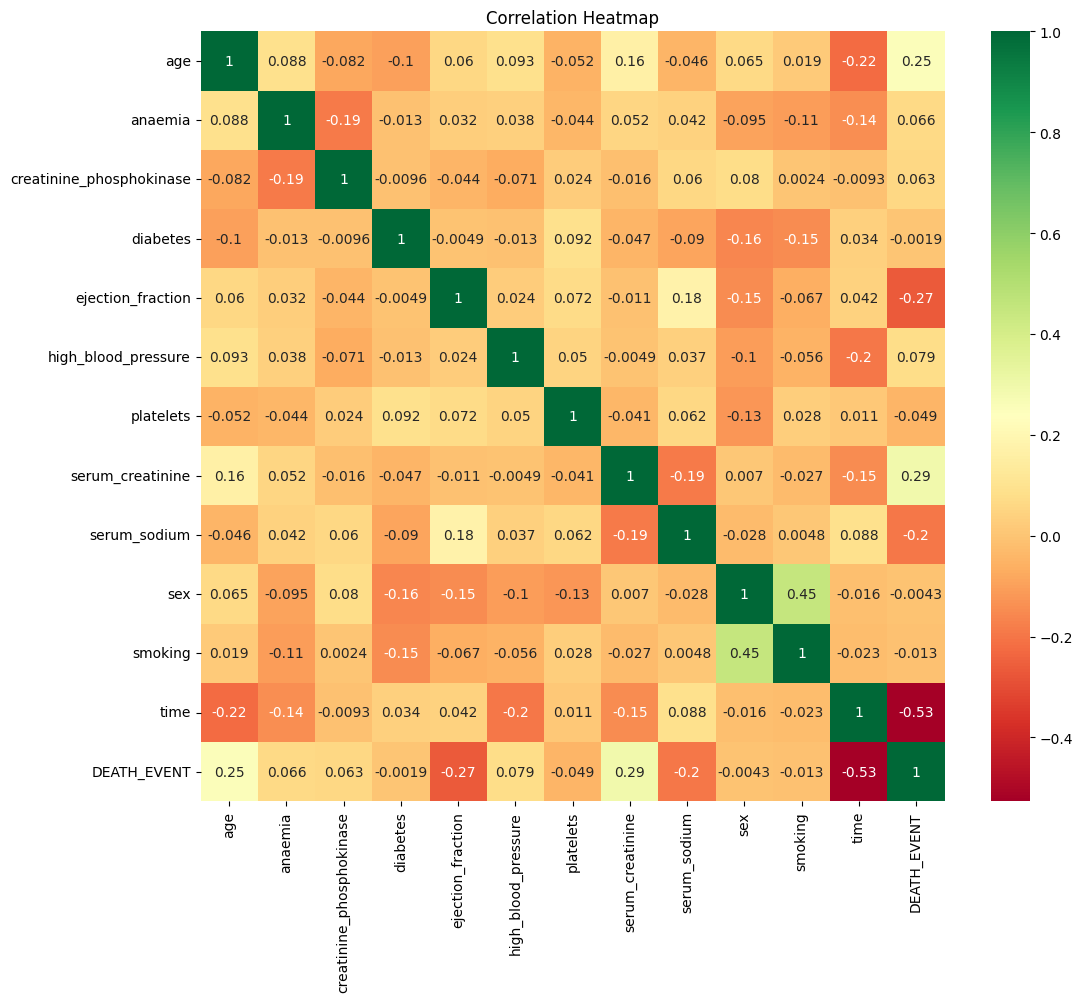

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap")

In [43]:
data.describe().T.sort_values(ascending = 0,by = "mean")

,count,mean,std,min,25%,50%,75%,max
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0


In [44]:
quality_para = ['sex','anaemia','diabetes','high_blood_pressure','smoking']
quantity_para = ['platelets','creatinine_phosphokinase','serum_sodium','time','age','ejection_fraction','serum_creatinine']

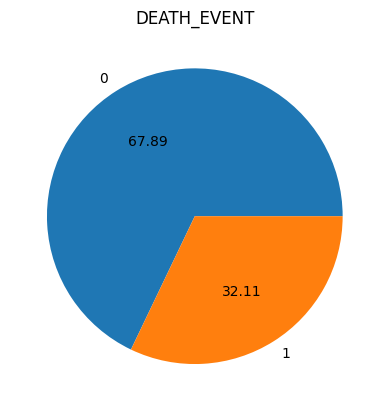

In [45]:
#DEATH_EVENT plot

data.groupby('DEATH_EVENT').size().plot(kind='pie', autopct='%.2f')
plt.title('DEATH_EVENT')
plt.show()

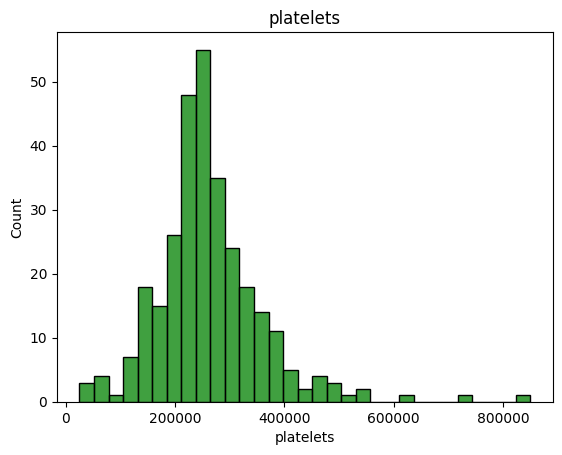

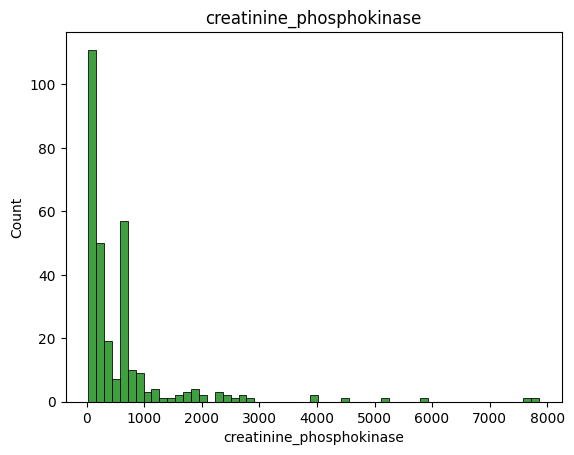

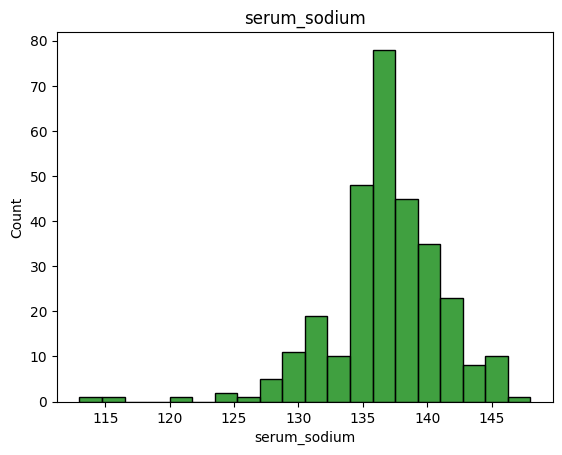

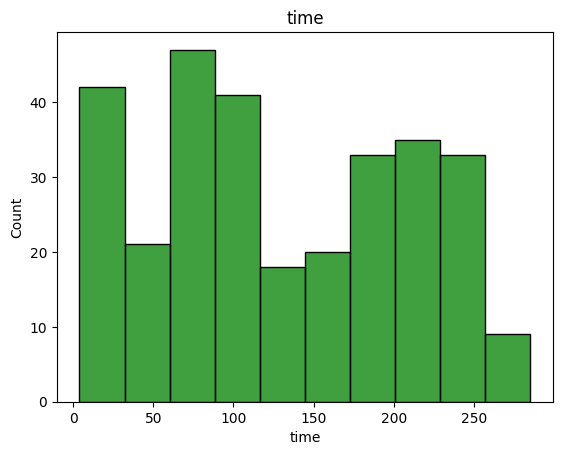

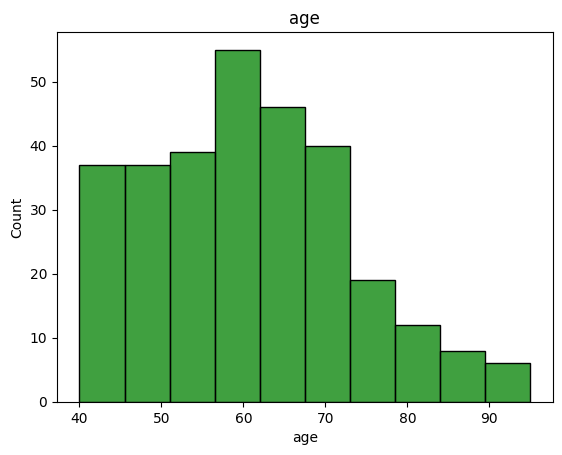

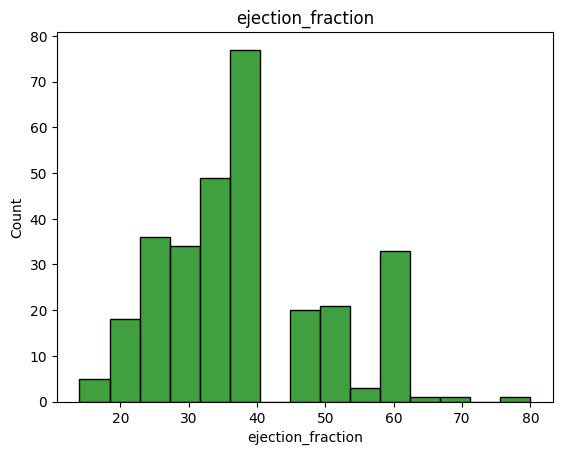

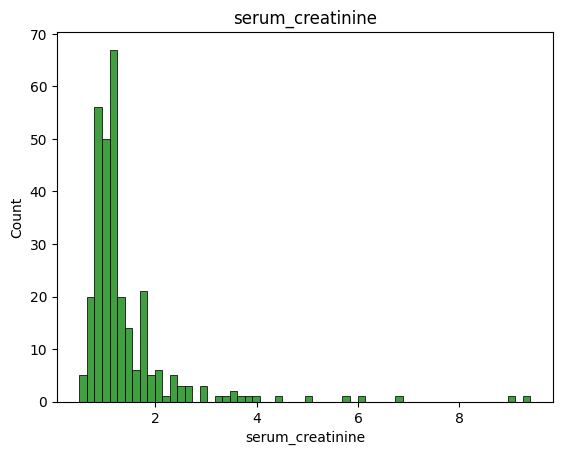

In [46]:
#quantity_para plot
for i in quantity_para:
    sns.histplot(data[i], kde=False, color='green')
    plt.title(i)
    plt.show()

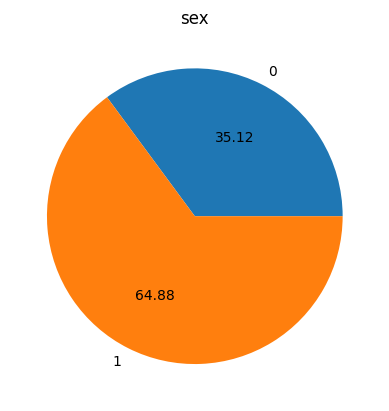

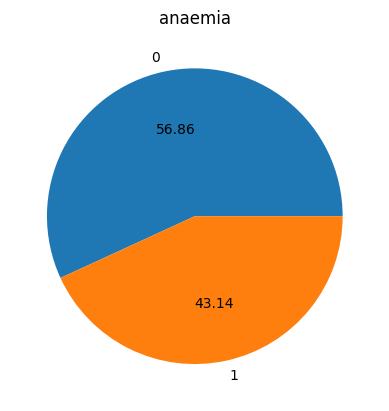

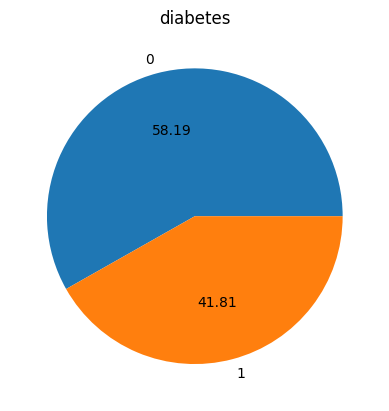

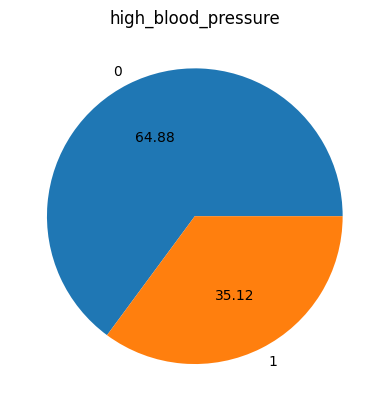

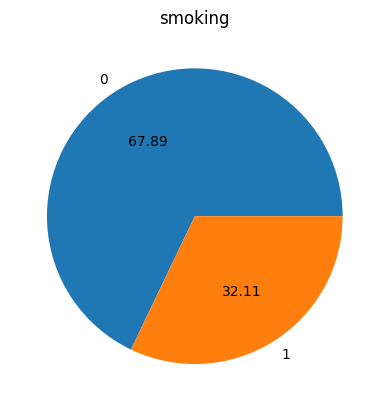

In [47]:
#quality_para plot
for i in quality_para:
    data.groupby(i).size().plot(kind='pie', autopct='%.2f',)
    plt.title(i)
    plt.show()

# 0 




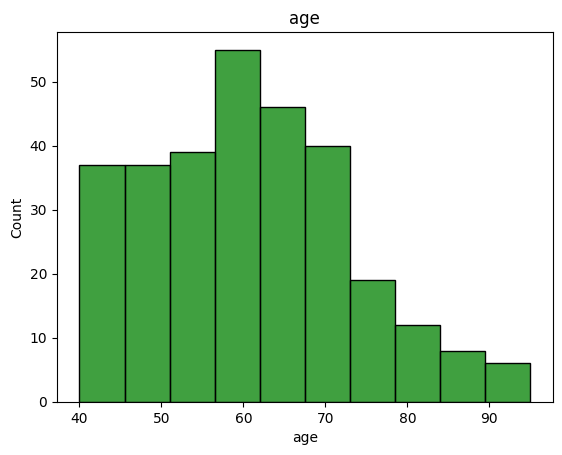

In [48]:
#age plot
sns.histplot(data['age'], kde=False, color='green')
plt.title('age')
plt.show()

In [49]:
x = data.drop(["DEATH_EVENT"],axis=1)
y = data['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

In [50]:
import statsmodels.api as sm

log_reg = sm.Logit(y_train, x_train).fit()
log_reg.summary()


Optimization terminated successfully.
         Current function value: 0.330385
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  239
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:                  0.4569
Time:                        23:27:08   Log-Likelihood:                -78.962
converged:                       True   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                 4.560e-23
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0637      0.019      3.414      0.001       0.027       0.100
anaemia                     -0.1642      0.429     -0.383      0.702      -1.005       0.676
creatinine_phosphokinase     0.0001      0.000      0.617      0.537      -0.000       0.001
diabetes                     0.5145      0.419      1.227      0.220      -0.307       1.336
ejection_fraction           -0.0817      0.020     -4.097      0.000      -0.121      -0.043
high_blood_pressure         -0.1398      0.428     -0.327      0.744      -0.978       0.698
platelets                -1.932e-06   2.25e-06     -0.858      0.391   -6.35e-06    2.48e-06
serum_creatinine             0.8278      0.201      4.116      0.000       0.434       1.222
serum_sodium                 0.0010      0.011      0.094      0.926      -0.020       0.022
sex                         -0.7468      0.479     -1.560      0.119      -1.685       0.191
smoking                      0.1779      0.505      0.352      0.725      -0.811       1.167
time                        -0.0225      0.004     -6.128      0.000      -0.030      -0.015
============================================================================================
"""

In [52]:
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)


lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_test, y_test)

y_pred_lr = lr.predict(x_test)
lr_acc = accuracy_score(y_pred_lr,y_test)

In [53]:
print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print("----------------------------------------------------------------")
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print("----------------------------------------------------------------")
print('LogisticRegressionModel accuracy is : ', lr_acc)

LogisticRegressionModel Train Score is :  0.8410041841004184
----------------------------------------------------------------
LogisticRegressionModel Test Score is :  0.8
----------------------------------------------------------------
LogisticRegressionModel accuracy is :  0.8


In [60]:
itc = lr.intercept_[0]
print(f'Intercept : {itc}')

c = lr.coef_
print('coefficient :')
for i in range(len(data.columns)-1):
    print(f'{data.columns[i]:30} {c[0][i]}')

Intercept : 0.00018354358511652062
coefficient :
age                            0.05931027818663501
anaemia                        -8.325166937018441e-05
creatinine_phosphokinase       0.00011092916157480556
diabetes                       0.0005191343702320419
ejection_fraction              -0.0668650929958312
high_blood_pressure            -0.0004944028223743321
platelets                      -1.439650422244252e-06
serum_creatinine               0.007651038628591383
serum_sodium                   0.0034821677369753054
sex                            -0.0007553830008849163
smoking                        -0.0003190100339062666
time                           -0.020718695452313456


In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)
print(len(y_pred))

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1]
60


In [ ]:
y_pred_prob = lr.predict_proba(x_test)[:,1]

print(x_test)
print(y_pred_prob)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   
278  50.0        1                      1051         1                 30   
93   60.0        1                       154         0                 25   
109  45.0        0                       292         1                 35   
5    90.0        1                        47         0                 40   
173  50.0        1                       115         0                 20   
97   70.0        1                        59         0                 60   
195  77.0        1                       418         0                 45   

In [ ]:
#predict by user input
import csv 

col = list(data.columns)
col.pop()
test=[]

# for i in range(len(col)):
    
#     test.append(float(input(f'{col[i]} : ')))

# for i in range(len(col)):
#     print(str(col[i])+' : '+str(test[i]))


# with open('input.csv', 'w', encoding='UTF8') as f:
#     writer = csv.writer(f)

#     writer.writerow(col)

#     writer.writerow(test)
    



In [ ]:
# inp_data =pd.read_csv("input.csv")
# inp_data

In [ ]:
# inp_pred = lr.predict(inp_data)
# print(inp_pred)

In [ ]:
# inp_pred_prob = lr.predict_proba(inp_data)[:,1]

# print(inp_data)
# print(inp_pred_prob)

In [ ]:

import tkinter as tk

window = tk.Tk()
window.geometry("600x400")
window.title('Heart Failed Prediction')

#label
age_label = tk.Label(window,
                text='age : ',
                font=('Arial',16))
age_label.place(x=40,y=40)

anaemia_label = tk.Label(window,
                text='anaemia : ',
                font=('Arial',16))
anaemia_label.place(x=40,y=80)

CPK_label = tk.Label(window,
                text='CPK : ',
                font=('Arial',16))
CPK_label.place(x=40,y=120)

diabetes_label = tk.Label(window,
                text='diabetes : ',
                font=('Arial',16))
diabetes_label.place(x=40,y=160)

EF_label = tk.Label(window,
                text='EF : ',
                font=('Arial',16))
EF_label.place(x=40,y=200)

BP_label = tk.Label(window,
                text='BP : ',
                font=('Arial',16))
BP_label.place(x=40,y=240)

platelets_label = tk.Label(window,
                text='platelets : ',
                font=('Arial',16))
platelets_label.place(x=300,y=40)

serum_creatinine_label = tk.Label(window,
                text='serum_creatinine : ',
                font=('Arial',16))
serum_creatinine_label.place(x=300,y=80)

serum_sodium_label = tk.Label(window,
                text='serum_sodium : ',
                font=('Arial',16))
serum_sodium_label.place(x=300,y=120)

sex_label = tk.Label(window,
                text='sex : ',
                font=('Arial',16))
sex_label.place(x=300,y=160)

smoking_label = tk.Label(window,
                text='smoking : ',
                font=('Arial',16))
smoking_label.place(x=300,y=200)

time_label = tk.Label(window,
                text='time : ',
                font=('Arial',16))
time_label.place(x=300,y=240)

prob_label = tk.Label(window,
                text=' ',
                font=('Arial',16))
prob_label.place(x=40,y=300)



#entry
age_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
age_entry.place(x=100,y=40)

anaemia_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
anaemia_entry.place(x=145,y=80)

CPK_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
CPK_entry.place(x=100,y=120)

diabetes_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
diabetes_entry.place(x=145,y=160)

EF_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
EF_entry.place(x=100,y=200)

BP_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
BP_entry.place(x=100,y=240)

platelets_entry = tk.Entry(window,
                font=('Arial',16),
                width=10)
platelets_entry.place(x=400,y=40)

serum_creatinine_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
serum_creatinine_entry.place(x=490,y=80)

serum_sodium_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
serum_sodium_entry.place(x=460,y=120)

sex_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
sex_entry.place(x=360,y=160)

smoking_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
smoking_entry.place(x=400,y=200)

time_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
time_entry.place(x=360,y=240)

#button
def click():
    inp=[]
    inp.append(int(age_entry.get()))
    inp.append(int(anaemia_entry.get()))
    inp.append(float(CPK_entry.get()))
    inp.append(float(diabetes_entry.get()))
    inp.append(float(EF_entry.get()))
    inp.append(float(BP_entry.get()))
    inp.append(float(platelets_entry.get()))
    inp.append(float(serum_creatinine_entry.get()))
    inp.append(float(serum_sodium_entry.get()))
    inp.append(float(sex_entry.get()))
    inp.append(float(smoking_entry.get()))
    inp.append(float(time_entry.get()))

    with open('input.csv', 'w', encoding='UTF8') as f:
        wt = csv.writer(f)

        wt.writerow(col)

        wt.writerow(inp)
    # 

    user_data =pd.read_csv("input.csv")

    user_pred_prob = lr.predict_proba(user_data)[:,1]


    
    prob_label.config(text='Predicted : '+str(round(user_pred_prob[0]*100,3))+' %')



    inp =[]

button = tk.Button(window,
                    text='Predict!!',
                    font=('Arial',16),
                    command=click)

button.place(x=400,y=300)

window.mainloop()